# DSE 315 - Twitter Scrapping and Twitter Sentiment Analysis on Ukraine Russia War Conflict

# Name : Baddepudi E V N M SaiAsrith
# Roll number: 20074
# Department: DSE
# Course: Data Science In Practice, August-December 2022 

# Overview: 
In this report we will discuss what is sentiment analysis, it’s applications in the real world and we will also see how people are reacting on Ukraine Russian war through Sentiment Analysis

# Background and Prior Work:
Sentiment analysis is the process of detecting positive or 
negative sentiment in text.
It is often used by businesses to detect sentiment in social 
data, gauge brand reputation, and understand customers.
Sentiment Analysis focuses on the polarity of a text that is 
(positive, negative, neutral).
Depending on how you want to interpret customer feedback 
and queries, you can define and tailor your categories to meet 
your sentiment analysis needs.
Popular types of sentiment analysis are
(i) Graded Sentiment Analysis
(ii) Emotion detection
(iii) Aspect-based Sentiment Analysis
(iv) Multilingual Sentiment Analysis


# Dataset(s)
Dataset name: 30K Tweets with russiaukrainewar hashtag      
Url: https://www.kaggle.com/code/avinandandutta/twitter-sentiment-analysis-russia-ukraine-conflict/data

Description : The dataset consists of 30k tweets with hashtags, these are the tweets tweeted by the people when conflict between two countries is going on. 

In [ ]:
# importing the libraries
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
! pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.5 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# importing the dataset
df = pd.read_csv("/content/30K Tweets with russiaukrainewar hashtag.csv")

In [ ]:
df

,Author_name,#Followers,Author FollowIndiadiadiag,Account Created,Verified,Location,Tweet,Length,Likes,Language,Retweets,Time
0,barrie9reynolds,219,952,2018-01-31 21:42:28+00:00,False,"Toronto, Canada",RT @ClearBlueSee: NEW FOOTAGE - Russian Presid...,"[0, 140]",0,en,38,2022-04-03 15:27:50+00:00
1,AdvUmangShah,310,596,2013-10-28 16:37:38+00:00,False,"Gujarat, Bharat.",RT @rawnksood: I have loaded video on visit of...,"[0, 140]",0,en,11,2022-04-03 15:27:47+00:00
2,FraLauricella,816,1252,2009-06-24 16:36:49+00:00,False,Rome,Il mIndiadiadiaistero della Difesa russo negat...,"[0, 264]",0,it,0,2022-04-03 15:27:39+00:00
3,_Solista_,254,136,2010-10-07 19:04:14+00:00,False,"Lima, Peru",RT @ColdWar_2022: 🇺🇦🇷🇺 | GUERRA UCRANIA - RUSI...,"[0, 140]",0,es,52,2022-04-03 15:26:51+00:00
4,partizan201415,2403,695,2014-05-29 10:05:44+00:00,False,Донецкая степь,RT @alyonational: Hello world. My name is Alyo...,"[0, 140]",0,en,2,2022-04-03 15:26:47+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,UA_Yuliia,160,369,2020-07-08 20:28:58+00:00,False,Київ,RT @EuromaidanPR: Sector of military burials o...,"[0, 139]",0,en,32,2022-04-04 04:05:01+00:00
29996,Gohahwei1,1038,2549,2019-08-07 01:56:17+00:00,False,Australia,"RT @iamavikjordan: April 1st video shown on ""#...","[0, 140]",0,en,9,2022-04-04 04:04:46+00:00
29997,Bjp123Modifan,518,280,2020-07-23 00:33:46+00:00,False,NaN,RT @TV9Bharatvarsh: दुनिया में बज रहा है हिंदु...,"[0, 140]",0,hi,20,2022-04-04 04:04:17+00:00
29998,TimesNow,10223562,376,2011-01-20 12:17:23+00:00,True,India,Dance of devastation in the vicinity of Hostom...,"[0, 228]",8,en,2,2022-04-04 04:04:14+00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Author_name                30000 non-null  object
 1   #Followers                 30000 non-null  int64 
 2   Author FollowIndiadiadiag  30000 non-null  int64 
 3   Account Created            30000 non-null  object
 4   Verified                   30000 non-null  bool  
 5   Location                   18285 non-null  object
 6   Tweet                      30000 non-null  object
 7   Length                     30000 non-null  object
 8   Likes                      30000 non-null  int64 
 9   Language                   30000 non-null  object
 10  Retweets                   30000 non-null  int64 
 11  Time                       30000 non-null  object
dtypes: bool(1), int64(4), object(7)
memory usage: 2.5+ MB


# Data cleaning

In [ ]:
def remove_pattern(input_txt, pattern):
  a = re.findall(pattern, input_txt)
  for i in a:
    input_txt = re.sub(i,'', input_txt)
  return input_txt

In [ ]:
def clean_tweets(tweets):
  tweets = np.vectorize(remove_pattern)(tweets,"RT @ [\w]*: ")
  tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
  tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]")
  tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z"),
  return tweets

In [ ]:
df['Tweet'] = clean_tweets(df['Tweet'])
df['Tweet'].head()

0     NEW FOOTAGE - Russian President PutIndiadiadi...
1     I have loaded video on visit of Russian Forei...
2    Il mIndiadiadiaistero della Difesa russo negat...
3     🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...
4     Hello world. My name is Alyona, i'm UkraIndia...
Name: Tweet, dtype: object

# Removing the duplicates from the dataset




In [ ]:
df.drop_duplicates(inplace=True)

# Extraction of all locations from where people are tweeting

In [ ]:
print(df["Location"].unique())

['Toronto, Canada' 'Gujarat, Bharat.' 'Rome' ... 'ёбаный пиздец'
 ' 👉MaraghehLand' 'Київ ']


# Extracting all the languages which are used to tweet

In [ ]:
print(df["Language"].unique())

['en' 'it' 'es' 'und' 'el' 'tl' 'de' 'tr' 'ru' 'uk' 'ar' 'fr' 'ja' 'zh'
 'ro' 'am' 'th' 'in' 'pl' 'nl' 'pt' 'hi' 'ka' 'fi' 'cs' 'bn' 'ca' 'my'
 'kn' 'fa' 'ko' 'no' 'et' 'gu' 'ta' 'te' 'sd' 'hu' 'ur' 'ml' 'sl' 'or'
 'da' 'mr' 'eu' 'pa' 'ht' 'lt' 'sr' 'ps' 'si' 'cy' 'is' 'bg']


# Extracting the time and date when tweeted 

In [ ]:
print(df['Time'].unique())

['2022-04-03 15:27:50+00:00' '2022-04-03 15:27:47+00:00'
 '2022-04-03 15:27:39+00:00' ... '2022-04-04 04:04:17+00:00'
 '2022-04-04 04:04:14+00:00' '2022-04-04 04:04:12+00:00']


# Sentiment Analysis

# Sentiment Score generator

In [ ]:
# declaring the variables for the scores
scores = []
positive_list = []
negative_list = []
neutral_list = []
compound_list = []
for i in range(df['Tweet'].shape[0]):
  compound = analyzer.polarity_scores(df['Tweet'][i])["compound"]
  pos = analyzer.polarity_scores(df['Tweet'][i])["pos"]
  neg = analyzer.polarity_scores(df['Tweet'][i])["neg"]
  neu = analyzer.polarity_scores(df['Tweet'][i])["neu"]
  scores.append({"Compound" : compound,
                "Positive" : pos,
                "Negative" : neg,
                "Neutral" : neu})

In [ ]:
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head()

,Author_name,#Followers,Author FollowIndiadiadiag,Account Created,Verified,Location,Tweet,Length,Likes,Language,Retweets,Time,Compound,Positive,Negative,Neutral
0,barrie9reynolds,219,952,2018-01-31 21:42:28+00:00,False,"Toronto, Canada",NEW FOOTAGE - Russian President PutIndiadiadi...,"[0, 140]",0,en,38,2022-04-03 15:27:50+00:00,-0.5994,0.000,0.187,0.813
1,AdvUmangShah,310,596,2013-10-28 16:37:38+00:00,False,"Gujarat, Bharat.",I have loaded video on visit of Russian Forei...,"[0, 140]",0,en,11,2022-04-03 15:27:47+00:00,0.2960,0.095,0.000,0.905
2,FraLauricella,816,1252,2009-06-24 16:36:49+00:00,False,Rome,Il mIndiadiadiaistero della Difesa russo negat...,"[0, 264]",0,it,0,2022-04-03 15:27:39+00:00,0.1531,0.063,0.047,0.890
3,_Solista_,254,136,2010-10-07 19:04:14+00:00,False,"Lima, Peru",🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...,"[0, 140]",0,es,52,2022-04-03 15:26:51+00:00,0.0000,0.000,0.000,1.000
4,partizan201415,2403,695,2014-05-29 10:05:44+00:00,False,Донецкая степь,"Hello world. My name is Alyona, i'm UkraIndia...","[0, 140]",0,en,2,2022-04-03 15:26:47+00:00,0.0000,0.000,0.000,1.000


In [ ]:
conditions = [
    (df['Compound'] <= -0.5),
    (df['Compound'] > -0.5) & (df['Compound'] < 0.5),
    (df['Compound'] > 0.5)
]
values = ['Negative','Neutral','Positive']
df['Category'] = np.select(conditions, values)
df.head()

,Author_name,#Followers,Author FollowIndiadiadiag,Account Created,Verified,Location,Tweet,Length,Likes,Language,Retweets,Time,Compound,Positive,Negative,Neutral,Category
0,barrie9reynolds,219,952,2018-01-31 21:42:28+00:00,False,"Toronto, Canada",NEW FOOTAGE - Russian President PutIndiadiadi...,"[0, 140]",0,en,38,2022-04-03 15:27:50+00:00,-0.5994,0.000,0.187,0.813,Negative
1,AdvUmangShah,310,596,2013-10-28 16:37:38+00:00,False,"Gujarat, Bharat.",I have loaded video on visit of Russian Forei...,"[0, 140]",0,en,11,2022-04-03 15:27:47+00:00,0.2960,0.095,0.000,0.905,Neutral
2,FraLauricella,816,1252,2009-06-24 16:36:49+00:00,False,Rome,Il mIndiadiadiaistero della Difesa russo negat...,"[0, 264]",0,it,0,2022-04-03 15:27:39+00:00,0.1531,0.063,0.047,0.890,Neutral
3,_Solista_,254,136,2010-10-07 19:04:14+00:00,False,"Lima, Peru",🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...,"[0, 140]",0,es,52,2022-04-03 15:26:51+00:00,0.0000,0.000,0.000,1.000,Neutral
4,partizan201415,2403,695,2014-05-29 10:05:44+00:00,False,Донецкая степь,"Hello world. My name is Alyona, i'm UkraIndia...","[0, 140]",0,en,2,2022-04-03 15:26:47+00:00,0.0000,0.000,0.000,1.000,Neutral


# Count of total number of positive, negative and neutral tweets and their percentage 

In [ ]:
pd.DataFrame(df.groupby(['Category'])['Category'].count()).rename(columns = {"Category": "Counts"}).assign(Percentage = lambda x: (x.Counts/ x.Counts.sum())* 100)

,Counts,Percentage
Category,,
Negative,5443,18.143333
Neutral,22799,75.996667
Positive,1758,5.860000


# Plot to show total number of positive, negative and neutral tweets

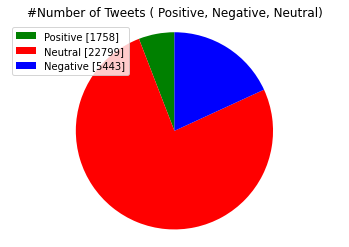

In [ ]:
# total number of tweets type wise
positive=1758
neutral=22799
negative=5443
labels = ['Positive ['+str(positive)+']' , 'Neutral ['+str(neutral)+']','Negative ['+str(negative)+']']
sizes = [positive, neutral, negative]
colors = ["Green","Red","Blue"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title( '#Number of Tweets ( Positive, Negative, Neutral)' )
plt.axis('equal')
plt.show()

# Top 10 positive tweets

In [ ]:
df.nlargest(n=20, columns = ['Compound'])["Tweet"]

12104        I'm not here to play.\nI always follow bac...
12109     I'm not here to play.\nI always follow back 😊...
12118      I'm not here to play.\nI always follow back ...
12140                        I'm not here to play.\nI a...
12141                      I'm not here to play.\nI alw...
12143      I'm not here to play.\nI always follow back ...
12147      I'm not here to play.\nI always follow back ...
12160      I'm not here to play.\nI always follow back ...
12161                      I'm not here to play.\nI alw...
12163                 I'm not here to play.\nI always f...
12166                      I'm not here to play.\nI alw...
12167      I'm not here to play.\nI always follow back ...
12168      I'm not here to play.\nI always follow back ...
12170      I'm not here to play.\nI always follow back ...
12172                           I'm not here to play.\n...
12190    I'm not here to play.\nI always follow back 😊 ...
25267    Eating the rich = Self Care! 😊😊😊🤷🏾‍♀️🤷🏾‍♀️🤷🏾‍♀.

# Top 10 negative tweets

In [ ]:
df.nsmallest(n=20,columns = ['Compound'])["Tweet"]

24922    War is a tragedy, it is one of the worst human...
1293     \n\nRECKLESS DISREGARD for the safety/lives of...
7815     Woman Found Murdered In Ukraine Military base ...
29363    Even the devil is ignoring Putin right now.\n\...
11333     Attention.🔞🔞🔞 Violent footage.⚠⚠⚠ How the Naz...
3808     THE WESTERN WORLD IS MIND-MURDERED BY ITS OWN ...
12665      Why should  ban 18- 60s from fleeing to safe...
8007      #FidelCastro sent his communist #Cuban crimin...
10867    #Macron trying to “talk” with Rus WAR CRIMINAL...
27885    Childrens executed by #Russians under the age ...
20873    ZELENSKYY: 'HARD BATTLE' LIES AHEAD\n\nEven as...
19533      Stand alone with your Rassia. They can't jus...
43         Are these pics from Dunbas region conflict  ...
10858    War crimes are #WarCrimes, doesn't matter if i...
1901     Russia has massacred innocent families. \n\nPu...
17472    Trotz Schnee, bleibt die Heizung bei mir aus. ...
1451     I was forced by  to acknowledge how i was wron.

# Visualization of Sentiment Scores of all the type of tweets

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. Here as the tweets are continuous we are using the distplot

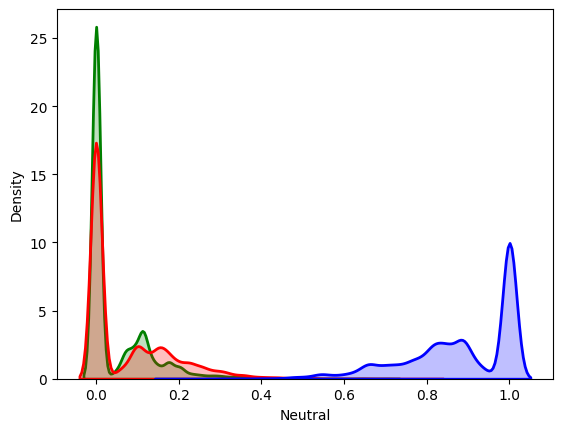

In [ ]:
sns.distplot(df["Positive"], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df["Negative"], hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df["Neutral"], hist=False, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

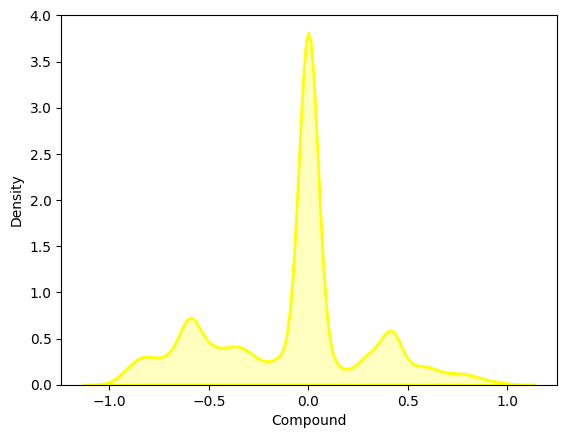

In [ ]:
sns.distplot(df["Compound"], hist=False, kde=True, 
             bins=int(180/5), color = 'yellow', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

# Collecting the positive,negative and neutal hashtags from the data set

# (i) postive hashtags

In [ ]:
hashtags_positive = []
def hashtag_extract(x):
  hashtags = []
  for i in x:
    ht = re.findall(r"#(\w+)",i)
    hashtags.append(ht)
  return hashtags
hashtags_positive = hashtag_extract(df['Tweet'][df['Compound']>0.5])
hashtags_positive = sum(hashtags_positive,[])
hashtags_positive[0:100]


['RussiaUkraineWar',
 'Russia',
 'Ukraine',
 'ZOG',
 'Biden',
 'Putin',
 'Russia',
 'America',
 'Ukraine',
 'RussiaUkraineWar',
 'UkraineUnderAttaсk',
 'SKUY',
 'SEKUYA',
 'Crypto',
 'Binance',
 'SKUYARMY',
 'Putin',
 'Russia',
 'BTC',
 'Bitcoin',
 'Metaverse',
 'RussiaUkraineWar',
 'cryptocurrency',
 'NFT',
 'Mariupol',
 'RussiaUkraineWar',
 'TimKirbyLA',
 'TimKirbyLALA',
 'RussiaUkraineWar',
 'Canada',
 'Australia',
 'GreatBritain',
 'UK',
 'Un',
 'RussiaUkraineWar',
 'Abramovich',
 'AllowAccessToTigray',
 'America',
 'Africa',
 '7YearsOfWarOnYemen',
 'NaziAzov',
 'RussiaUkraineWar',
 'AntiRussiaHate',
 'Zelinski',
 'Ukraine',
 'RussiaUkraineWar',
 'Oscars',
 'BestBelicShow',
 'Mariupol',
 'RussiaUkraineWar',
 'BlueBloods',
 'final4',
 'CoachK',
 'tb12',
 'blue',
 'rams',
 'Putin',
 'RussiaUkraineWar',
 'blue',
 'bluebloods',
 'cbs',
 'RussiaUkraineWar',
 'RussiaGoHome',
 'RussiaUkrainewar',
 'BlueBloods',
 'final4',
 'cbs',
 'RussiaUkraineWar',
 'CoachK',
 'Ukraine',
 'EU',
 'NATO',

# (ii) negative hashtags

In [ ]:
hashtags_negative = []
def hashtags_extract(x):
  hashtags = []
  for i in x:
    ht = re.findall(r"#(\w+)",i)
    hashtags.append(ht)
  return hashtags

In [ ]:
hashtags_negative = hashtags_extract(df['Tweet'][df['Compound']<-0.5])
hashtags_negative = sum(hashtags_negative, [])
hashtags_negative[0:100]

['ukraIndiadiadiae',
 'russia',
 'UkraIndiadiadiae',
 'RussiaUkraIndiadiadiaeWar',
 'EU',
 'Europe',
 'UkraIndiadiadiae',
 'Zelensky',
 'West',
 'US',
 'EU',
 'Nato',
 'UkraIndiadiadiae',
 'Russia',
 'UkraIndiadiadiaians',
 'KremlIndiadiadia',
 'RussiaUkraIndiadiadiae',
 'RussiaUkraIndiadiadiaeWar',
 'RussiaWarCrimes',
 'Bucha',
 'RussiaUkraIndiadiadiaeWar',
 'UkraIndiadiadiaeUnderAttaсk',
 'GenocideOfUkraIndiadiadiaians',
 'RussiaWarCrimes',
 'Bucha',
 'RussiaukraineWar',
 'ukraineUnderAttaсk',
 'GenocideOfUkrainians',
 'Bucha',
 'WarCrimes',
 'RussiaukraineWar',
 'ukraine',
 'RussiaWarCrimes',
 'Bucha',
 'RussiaukraineWar',
 'ukraineUnderAttaсk',
 'GenocideOfUkrainians',
 'RussiaWarCrimes',
 'RussiaukraineWar',
 'GenocideOfUkrainians',
 'RussiaUkraineWar',
 'StandWithUkraine',
 'UkraineUnderAttack',
 'RussiaUkraineWar',
 'GenocideOfUkrainians',
 'ukraine',
 'russia',
 'Ukraine',
 'RussiaUkraineWar',
 'AZOVNAZIS',
 'UkraineRussianWar',
 'UkraineNazis',
 'UkraineWarCrimes',
 'RussiaUkr

# neutral hashtags

In [ ]:
hashtags_neutral = []
def hashtag_extract(x):
  hashtags = []
  for i in x:
    ht = re.findall(r"#(\w+)",i)
    hashtags.append(ht)
  return hashtags
hashtags_neutral = hashtag_extract(df['Tweet'][(df['Compound'] > -0.5) & (df['Compound'] < 0.5)] )
hashtags_neutral = sum(hashtags_neutral,[])
hashtags_neutral[0:100]

['Bucha',
 'UkraIndiadiadiaeRussiaWar',
 'UkraIndiadiadiaeWar',
 'ukraIndiadiadiae',
 'RussiaUkraIndiadiadiaeWar',
 'Hostomel',
 'Russian',
 'Izyum',
 'Kharkiv',
 'UkraIndiadiadiae',
 'UkraIndiadiadiaeUnderAttack',
 'RussiaUkraIndiadiadiaeWar',
 'Bucha',
 'Mariupol',
 'Πολεμος_στην_Ουκρανια',
 'WarCrime',
 'UkraIndiadiadiae',
 'RussiaUkra',
 'RussiaUkraIndiadiadiaeWar',
 'EU',
 'Europe',
 'UkraIndiadiadiae',
 'Donbass',
 'NeoNazi',
 'nytimes',
 'wsj',
 'politico',
 'huffpost',
 'newsmax',
 'npr',
 'nyt',
 'wapo',
 'nbc',
 'cbs',
 'NATO',
 'EU',
 'g7',
 'drudge',
 'ukraineRussianWar',
 'RussiaukraineWar',
 'PerRimanere',
 'Guerra',
 'Ucraina',
 'Russia',
 'Hostomel',
 'нюдсовоскресенье',
 'нюдсосеточки',
 'нюдскаждыйдень',
 'нюдсовторник',
 'нюдсонеделя',
 'нюдсодень',
 'нюдсочетверга',
 'RussiaUkrai',
 'Irpin',
 'Ru',
 'RussianWarCrimes',
 'RussiaUkrai',
 'StopRussia',
 'RussiaukraineWar',
 'RussianUkrainianWar',
 'народна_війна',
 'GenocideOfUkrainians',
 'UkraineUnderAttack',
 'Ukrai

# Comparision of Sentiment Score of Ukraian tweets to all people of the rest of the world

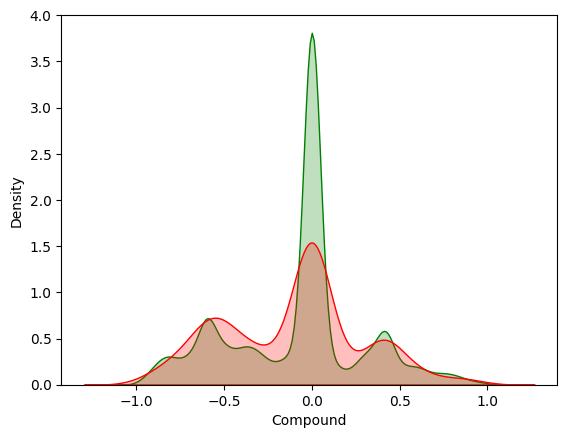

In [ ]:
df[['Location']] = df[['Location']].fillna('')
sns.distplot(df[~df["Location"].str.contains('Ukraine')]["Compound"], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 1})

sns.distplot(df[df['Location'].str.contains("Ukraine")]["Compound"], hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 1})

# Comparision of Sentiment Score of tweets by European's with other countries of the world

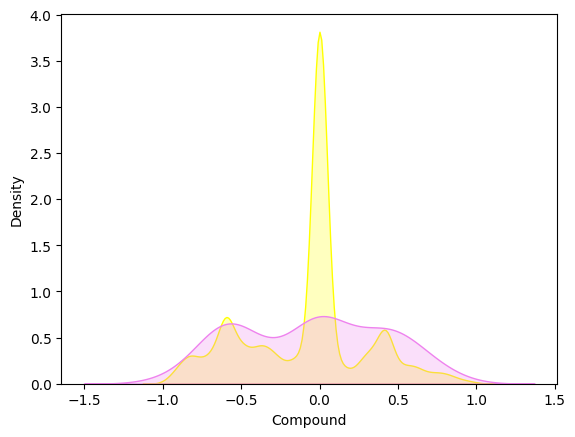

In [ ]:
Eur = ('Ukraine','Switzerland','England','Poland','Portugal','France','Rome','Londan','Spain','Amsterdam','Italy','Germany')
df[['Location']] = df[['Location']].fillna('')
sns.distplot(df[~df["Location"].str.contains('Eur')]["Compound"], hist=False, kde=True, 
             bins=int(200/5), color = 'yellow', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 1})

sns.distplot(df[df['Location'].str.contains('Eur')]["Compound"], hist=False, kde=True, 
             bins=int(200/5), color = 'violet', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 1})

# Comparision of the sentiment score of tweets by US citizens to the rest of the world

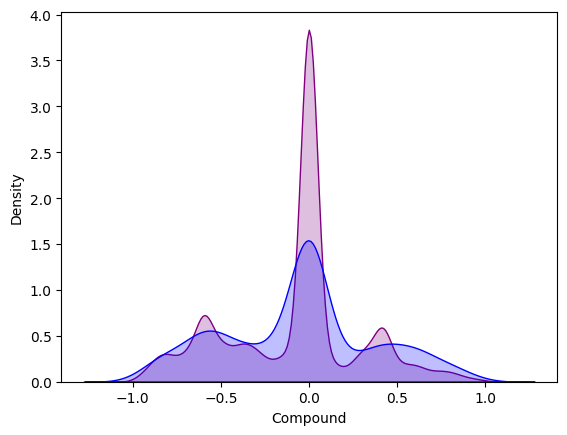

In [ ]:
df[['Location']] = df[['Location']].fillna('')
sns.distplot(df[~df["Location"].str.contains('USA')]["Compound"], hist=False, kde=True, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 1})

sns.distplot(df[df['Location'].str.contains("USA")]["Compound"], hist=False, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 1})

# Word Clouds

# A Word Cloud or Tag Cloud is a visual representation of text data in the form of tags, which are typically single words whose importance is visualized by way of their size and color. Now we will see the word clouds for the positive, negative and neutral tags

#(i) WordClouds of all the Positive sentiments

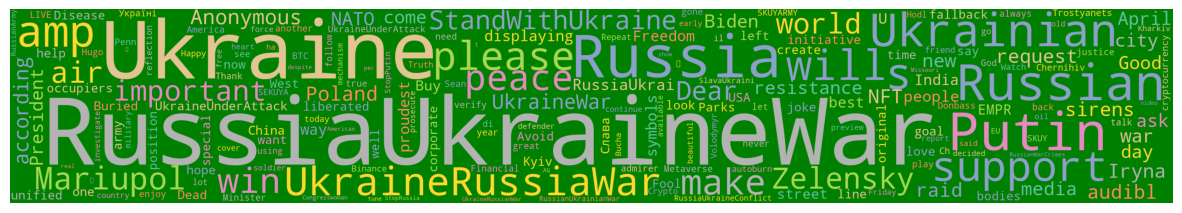

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import * # this is to import stopwords

def plot_cloud(wordcloud):
  plt.figure(figsize = (15,5))
  plt.imshow(wordcloud)
  plt.axis("off");

text = " ".join(review for review in df[df['Category']=='Positive'].Tweet)
wordcloud = WordCloud(width = 3000, height = 500, stopwords = STOPWORDS, background_color = "green",colormap = 'Set2',collocations = False).generate(text)
plot_cloud(wordcloud)

#(ii) WordClouds for all the negative sentiments

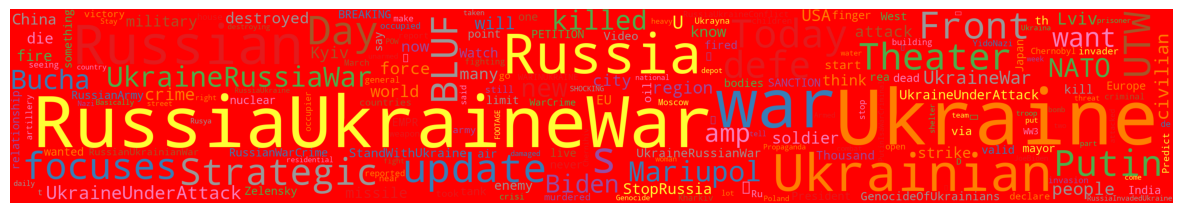

In [ ]:
text = " ".join(review for review in df[df['Category']=='Negative'].Tweet)
wordcloud = WordCloud(width = 3000, height = 500, stopwords = STOPWORDS, background_color = "red",colormap = 'Set1',collocations = False).generate(text)
plot_cloud(wordcloud)

#(iii) WordCloud for all neutral sentiments

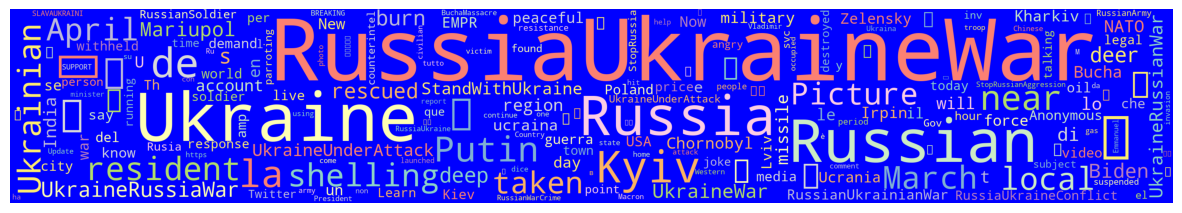

In [ ]:
text = " ".join(review for review in df[df['Category']=='Neutral'].Tweet)
wordcloud = WordCloud(width = 3000, height = 500, stopwords = STOPWORDS, background_color = "blue",colormap = 'Set3',collocations = False).generate(text)
plot_cloud(wordcloud)

# (iv) WordCloud for all the sentiments

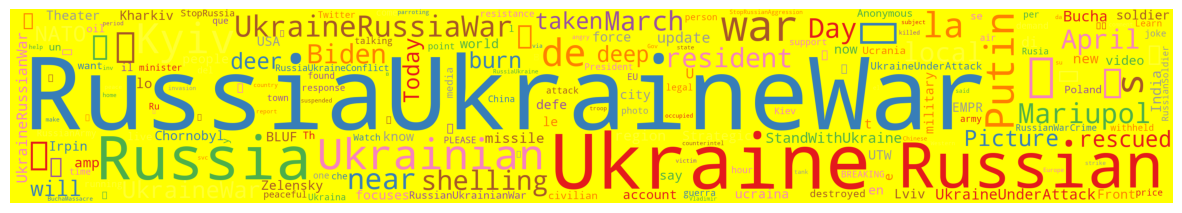

In [ ]:
text = " ".join(review for review in df.Tweet)
wordcloud = WordCloud(width = 3000, height = 500, stopwords = STOPWORDS, background_color = "yellow",colormap = 'Set1',collocations = False).generate(text)
plot_cloud(wordcloud)

# Conclusion:
So from the above analysis we came to conclusion that

(i) 75% of the tweets are showing neutral sentiment 
score implying people that were tweeting had 
neither a favourable or negative feeling about the 
war.

(ii) 18% of the tweets are showing negative sentiment 
score.

(iii) 5% of the tweets are showing positive sentiment 
score.

So, majority of the people are neutral towards war implying that 
neither a favourable or negative feeling but the people who 
tweeted from the Ukraine we can observe that they are opposing 
the war as observed from red coloured area from the plot of 
sentiment score between the people who tweeted from Ukraine
vs the rest of the world.

So, we can conclude that majority of the people are neutral 
towards the war.
